In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data Analysis

Row Fields:
DateTime Stamp; Bar OPEN Bid Quote; Bar HIGH Bid Quote; Bar LOW Bid Quote; Bar CLOSE Bid Quote; Volume

DateTime Stamp Format:
Excel Native

In [2]:
df = pd.read_excel('data/eur-gbp.xlsx', names=['date','open','high','low','close','volume'])
df.head()

,date,open,high,low,close,volume
0,2018-01-01 17:02:00,0.88800,0.88800,0.88800,0.88800,0
1,2018-01-01 17:03:00,0.88806,0.88806,0.88806,0.88806,0
2,2018-01-01 17:04:00,0.88806,0.88806,0.88806,0.88806,0
3,2018-01-01 17:05:00,0.88818,0.88818,0.88818,0.88818,0
4,2018-01-01 17:06:00,0.88812,0.88812,0.88812,0.88812,0


In [28]:
df.iloc[-1,0]

Timestamp('2018-12-31 16:58:00')

In [3]:
df.shape

(369383, 6)

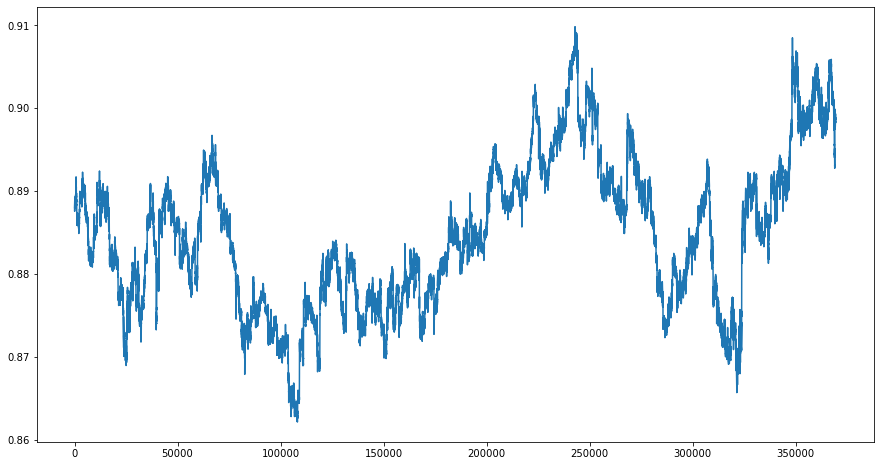

In [4]:
plt.figure(figsize=(15,8))
plt.plot(range(len(df)), df.iloc[:,4])

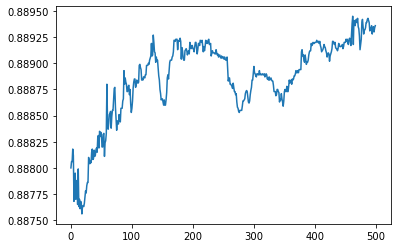

In [5]:
a = df['close'][:500]
plt.plot(range(len(a)), a)

### Modelling

In [15]:
from keras import Model
from keras.layers import Input, concatenate, Dense, Flatten
from keras.utils import plot_model

import pydot
import graphviz
import pydotplus

In [141]:
window = 2

In [224]:
# Inputs
price_input = Input(shape=(window,), name='price input')
bank_input = Input(shape=(1,), name='bank input')

# Adjsusted model
price_layer1 = Dense(32, activation='relu', name='price_layer1')(price_input)
price_layer2 = Dense(16, activation='relu', name='price_layer2')(price_layer1)
price_final = Flatten(name='ts_flatten')(price_layer2)

# Fixed layers and output
concat_layer = concatenate([price_final, bank_input], name='concat_layer')
fixed_layer1 = Dense(8, activation='relu', name='fixed_layer1')(concat_layer)
fixed_layer2 = Dense(4, activation='relu', name='fixed_layer2')(fixed_layer1)

action_output = Dense(1, activation='linear', name='action_output')(fixed_layer2)

model = Model(inputs=[price_input, bank_input],
              outputs=[action_output])

model.compile(optimizer='Adam', loss={'action_output':'mse'})

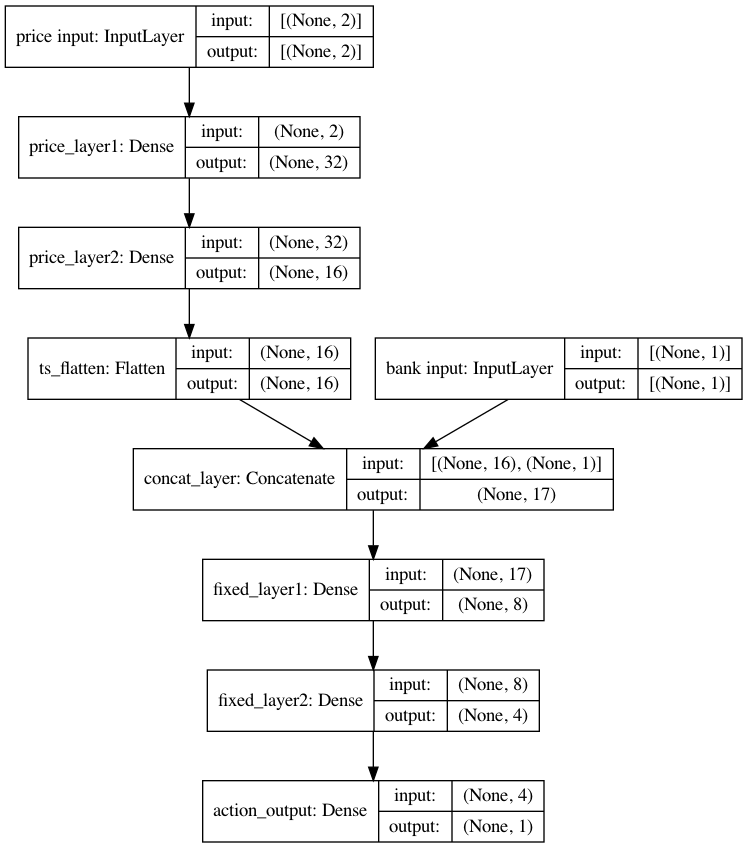

In [225]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [230]:
history = model.fit({"price input":np.ones((3,2)), "bank input":np.ones((3,1))},
                    {"action_output":np.ones((3,1))}
                   )

1/1 [==============================] - 0s 3ms/step - loss: 0.4702


In [221]:
pred = model.predict({"price input":np.ones((1,2)), "bank input":np.ones((1,1))})
pred.shape

(1, 1)